In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("../incl/")

import narrom
import ELPH_dyn
import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
runs = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

n_runs = len(runs)
n_kmax = runs[0].shape[0]

print(n_runs, 'loaded with n_kmax =', n_kmax)


1000 loaded with n_kmax = 200


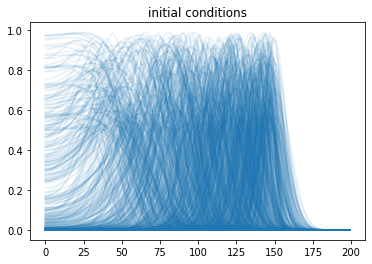

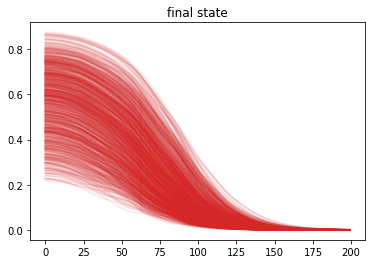

In [4]:
for k in range(n_runs):
    plt.plot(runs[k][:,0], c='C0', alpha=0.1)

plt.title('initial conditions')
plt.show()


for k in range(n_runs):
    plt.plot(runs[k][:,-1], c='C3', alpha=0.1)

plt.title('final state')
plt.show()

In [7]:
kmax = 4.0

n_runs = 1000

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.0, high=0.7, size=n_runs)
paras[:,1] = rng.uniform(low=0.02, high=0.1, size=n_runs)
paras[:,2] = 0.1

inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
#     inits[r][:n_kmax] *= 0.95 / dist_max
    inits[r][:n_kmax] *= rng.uniform(low=0.5, high=.99) / dist_max
    paras[r,2] = ELPH_dyn.get_density_from_state(inits[r][:n_kmax], kmax/n_kmax)
    

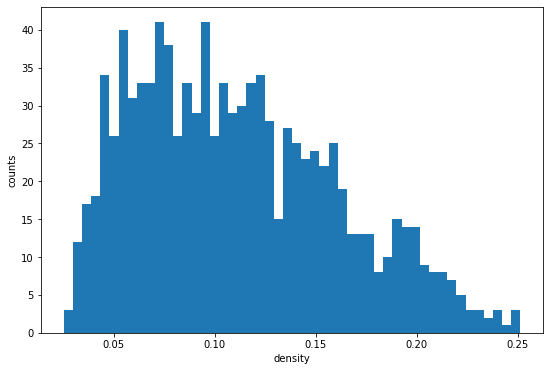

In [8]:
# plt.grid()
plt.hist(paras[:,2],bins=50)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [11]:
E_el = ELPH_dyn.electron_dispersion(np.linspace(0,kmax,n_kmax,endpoint=True),0)

def fermi(eps, mu, T):
    return 1./(1. + np.exp( (eps-mu)/(T*ELPH_dyn.kB) ))

from scipy.optimize import curve_fit

Tar = np.zeros((n_runs,2))

for k,run in enumerate(runs):
    dist = run[:,-1]
    
    popt, pcov = curve_fit(fermi, E_el, dist, [0,300])
    perr = np.sqrt(np.diag(pcov))
    
    Tar[k,0] = popt[1]
    Tar[k,1] = perr[1]/popt[1]

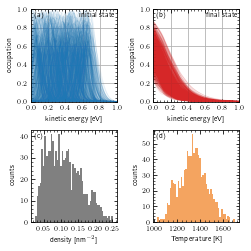

In [12]:
tmax = 2
kmax = 4


E_el = ELPH_dyn.electron_dispersion(np.linspace(0,kmax,n_kmax,endpoint=True),0)


####################################################
####################################################
####################################################

from matplotlib import rc
rc('text', usetex=True)

from matplotlib import gridspec
import matplotlib.ticker as ticker

fs = 7
fig = plt.figure(figsize=(3.5,3.5))
plt.rcParams.update({'font.size': fs})
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[1,1], height_ratios=[1,1])


# , rasterized=True

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,0])

ax00.set_rasterized(True)

plt.grid(0.5)


for k in range(n_runs):
    plt.plot(E_el, runs[k][:,0], c='C0', alpha=0.1, lw = 0.7, rasterized=True)



plt.xlim(0,1.0)
plt.ylim(0,1)
    
# plt.title('initial conditions')

plt.xlabel(r'kinetic energy [eV]')
plt.ylabel(r'occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.04))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(a)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)
plt.text(0.97, 0.97,r'initial state', horizontalalignment='right', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################


ax00 = plt.subplot(gs[0,1])

ax00.set_rasterized(True)

plt.grid(0.5)

for k in range(n_runs):
    plt.plot(E_el, runs[k][:,-1], c='C3', alpha=0.1, lw = 0.7)
    
plt.xlim(0,1.0)
plt.ylim(0,1)    
    
# plt.title('final state')

plt.xlabel(r'kinetic energy [eV]')
plt.ylabel(r'occupation')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.04))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(0.04))
# ax00.yaxis.set_major_formatter(ticker.NullFormatter())
# ax00.yaxis.set_minor_formatter(ticker.NullFormatter())


plt.text(0.03, 0.97,r'(b)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)
plt.text(0.97, 0.97,r'final state', horizontalalignment='right', verticalalignment='top', transform=ax00.transAxes)

####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[1,0])

plt.hist(paras[:,2],bins=50, color='gray')
plt.xlabel('density [nm$^{-2}$]')
plt.ylabel('counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(2.))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(c)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################

ax00 = plt.subplot(gs[1,1])

plt.hist(Tar[:,0],bins=50, color='sandybrown')
plt.xlabel('Temperature [K]')
plt.ylabel('counts')

ax00.xaxis.set_ticks_position('both')
ax00.yaxis.set_ticks_position('both')
ax00.tick_params(which='both', direction='in', color='k')

ax00.xaxis.set_major_locator(ticker.MultipleLocator(200))
ax00.xaxis.set_minor_locator(ticker.MultipleLocator(40))
# ax00.xaxis.set_major_formatter(ticker.NullFormatter())
# ax00.xaxis.set_minor_formatter(ticker.NullFormatter())

ax00.yaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax00.yaxis.set_minor_locator(ticker.MultipleLocator(2.))
#ax00.yaxis.set_major_formatter(ticker.NullFormatter())
#ax00.yaxis.set_minor_formatter(ticker.NullFormatter())

plt.text(0.03, 0.97,r'(d)', horizontalalignment='left', verticalalignment='top', transform=ax00.transAxes)


####################################################
####################################################
####################################################

plt.tight_layout()

plt.savefig('/home/agluedge/Preprints/ELPH/figs/dataset.pdf', dpi=600)
plt.show()

[-4.66572203e-02  1.36308528e+03]
[-0.00422227  0.00171635]


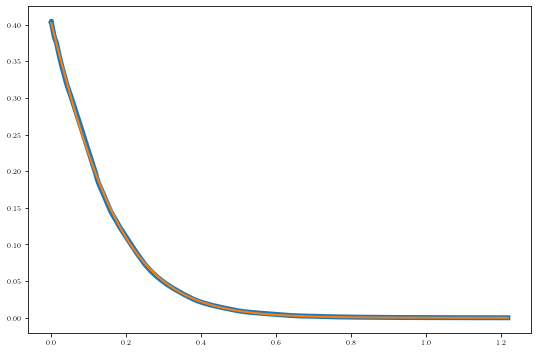

In [13]:
dist = runs[139][:,-1]


def fermi(eps, mu, T):
    return 1./(1. + np.exp( (eps-mu)/(T*ELPH_dyn.kB) ))


from scipy.optimize import curve_fit


popt, pcov = curve_fit(fermi, E_el, dist, [0,300])
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr/popt)


plt.plot(E_el,dist, lw=5)
plt.plot(E_el, fermi(E_el,*popt), lw=2)


plt.show()

In [14]:
Tar = np.zeros((n_runs,2))


for k,run in enumerate(runs):
    dist = run[:,-1]
    
    popt, pcov = curve_fit(fermi, E_el, dist, [0,300])
    perr = np.sqrt(np.diag(pcov))
    
    Tar[k,0] = popt[1]
    Tar[k,1] = perr[1]/popt[1]
    


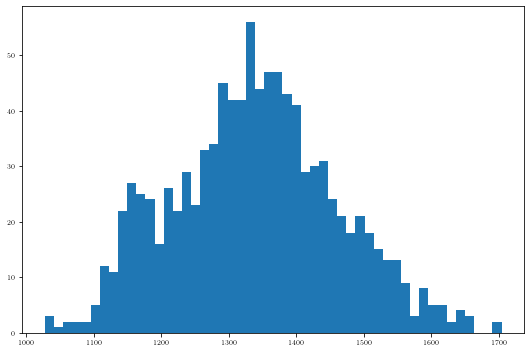

In [15]:
plt.hist(Tar[:,0],bins=50)

plt.show()